In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
DATASET_PATH = '/content/drive/MyDrive/UIT - Master/TaiLieuHocTap/HocKy1_2025/XuLyAnhVaThiGiacMayTinh/BaiTapXuLyAnh/HoaVietNam2025'

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [26]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dir = os.path.join(DATASET_PATH, 'train')
test_dir = os.path.join(DATASET_PATH, 'test')

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 168 images belonging to 6 classes.
Found 42 images belonging to 6 classes.
Found 62 images belonging to 6 classes.


In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - accuracy: 0.1522 - loss: 1.9833 - val_accuracy: 0.3571 - val_loss: 1.5736
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4286 - loss: 1.4315 - val_accuracy: 0.6429 - val_loss: 1.1139
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8293 - loss: 0.9346 - val_accuracy: 0.8810 - val_loss: 0.7573
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.9138 - loss: 0.6403 - val_accuracy: 0.9286 - val_loss: 0.5490
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9360 - loss: 0.4835 - val_accuracy: 0.9286 - val_loss: 0.4262
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9487 - loss: 0.3855 - val_accuracy: 0.9286 - val_loss: 0.3486
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.9792 - loss: 0.2930 - val_accuracy: 0.9524 - val_loss: 0.2928
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9870 - loss: 0.2155 - val_accuracy: 0.9524 - val_loss: 0.2543
Epoch 9/10
6/6

In [33]:
loss, acc = model.evaluate(test_gen)
print(f'Test accuracy: {acc:.2f}')
print(f'Test loss: {loss:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.8407 - loss: 0.4632
Test accuracy: 0.85
Test loss: 0.43


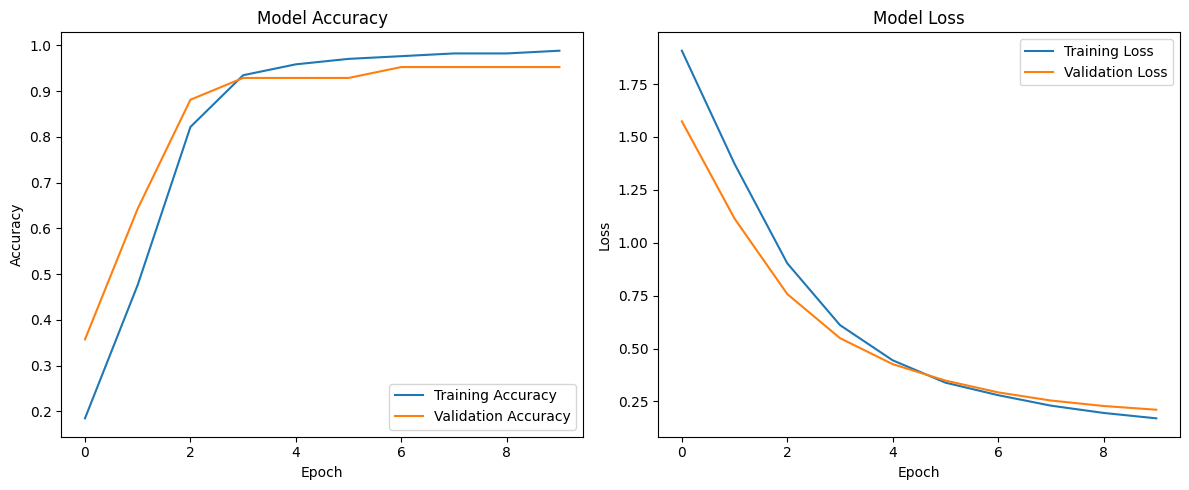

In [34]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step


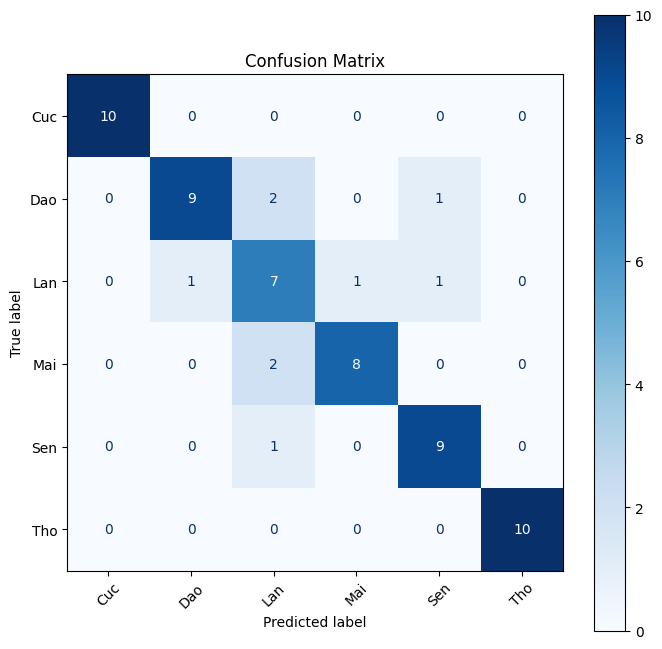

In [30]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from the test generator
y_true = test_gen.classes

# Get predicted labels from the model
# (predict returns probabilities, so take argmax)
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)

# Get class names
class_names = list(test_gen.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

         Cuc       1.00      1.00      1.00        10
         Dao       0.90      0.75      0.82        12
         Lan       0.58      0.70      0.64        10
         Mai       0.89      0.80      0.84        10
         Sen       0.82      0.90      0.86        10
         Tho       1.00      1.00      1.00        10

    accuracy                           0.85        62
   macro avg       0.87      0.86      0.86        62
weighted avg       0.87      0.85      0.86        62



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


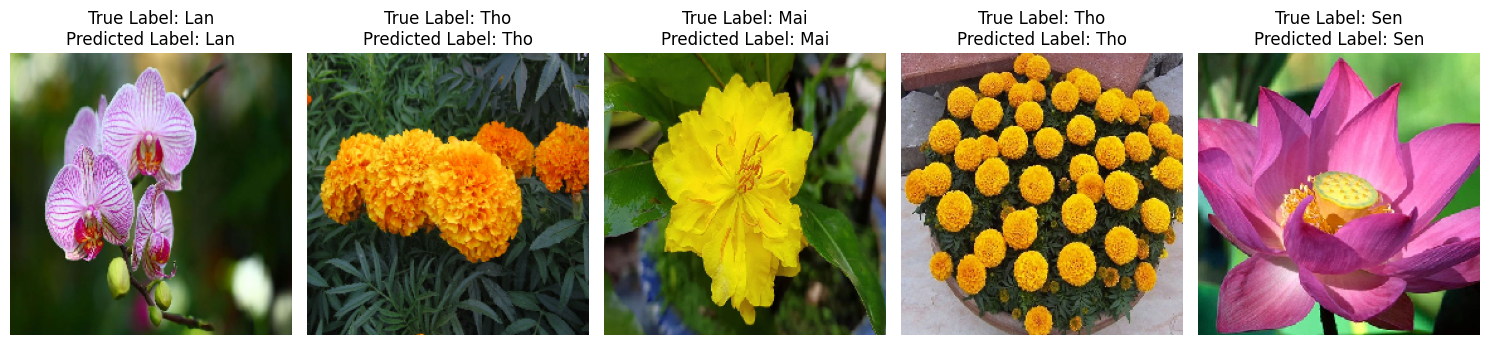

In [36]:
import random

# Get 5 random indices from the test set
sample_indices = random.sample(range(len(test_gen.filenames)), 5)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    # Load image
    img_path = test_gen.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=IMG_SIZE)
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)
    
    # Predict
    pred_probs = model.predict(img_array_exp)
    pred_class = np.argmax(pred_probs, axis=1)[0]
    pred_label = class_names[pred_class]
    true_label = class_names[y_true[idx]]
    
    # Display
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True Label: {true_label}\nPredicted Label: {pred_label}")
plt.tight_layout()
plt.show()